<a href="https://colab.research.google.com/github/Rogerio-mack/IMT_Ciencia_de_Dados/blob/main/IMT_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="ITM">
</head>

<img src="https://maua.br/images/selo-60-anos-maua.svg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# **PCA: Principal Component Analysis**

O **PCA (Principal Component Analysis)**, ou Análise de Componentes Principais, é uma técnica matemática criada em 1901 por Karl Pearson. Ela transforma observações de variáveis possivelmente correlacionadas em valores de variáveis linearmente não correlacionadas chamados componentes principais. Os componentes principais são independentes apenas se os dados forem normalmente distribuídos conjuntamente.

A técnica é sensível à escala das variáveis originais e é frequentemente usada na análise exploratória de dados e na construção de modelos preditivos. O PCA é realizado por meio da decomposição em autovalores de uma matriz de covariância após a centralização e normalização dos dados. Os resultados são expressos em termos de pontuações de componentes, fornecendo uma representação em dimensões mais baixas dos dados originais, revelando sua estrutura interna, de uma forma que melhor explica a variância nos dados. Na visualização de dados, o PCA ainda pode ainda fornecer uma visualização em dimensões mais baixas dos dados, com uma verdadeira *sombra* do objeto original quando visto de seu ponto mais informativo.

O PCA é, assim, uma técnica de aprendizado não supervisionado, frequentemente usada para descobrir estruturas em dados de alta dimensão e para redução de dimensionalidade.


## PCA Layman's Introduction

Antes de entrarmos na matemática e no uso dessa técnica entenda esse importante conceito com esse vídeo de 1.33min:

In [ ]:
from IPython.display import YouTubeVideo
video = YouTubeVideo('BfTMmoDFXyE?si=Z4UiLERgx13Ye7vn')
video

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mticker
import seaborn as sns

# Matemática: `by scratch`

> *O **PCA** é uma **transformação linear ortogonal** que transforma os dados em um novo sistema de coordenadas tal que a maior variação dos dados ficam na primeira coordenada (chamada de primeiro componente principal), a segunda maior variância na segunda coordenada e assim por diante.*

## Mudança de Coordenadas

In [ ]:
np.random.seed(1)

x = np.random.normal(loc=0.0, scale=0.1, size=100)
y = 2*x + np.random.normal(loc=0.0, scale=0.1, size=100)

X = pd.DataFrame( np.array([x,y]).T, columns=['x','y'])
X.head()

,x,y
0,0.162435,0.280156
1,-0.061176,0.000099
2,-0.052817,-0.065285
3,-0.107297,-0.155236
4,0.086541,0.063590


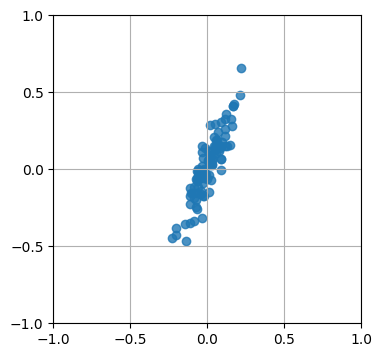

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(4,4))

np.random.seed(1)

lim = np.ceil(abs(np.array([x,y])).max())

ax.scatter(X.x,X.y,alpha=0.8)

ax.xaxis.set_major_locator(mticker.MaxNLocator(4))
ax.yaxis.set_major_locator(mticker.MaxNLocator(4))
ax.set_xlim([-lim,lim])
ax.set_ylim([-lim,lim])
ax.set_aspect('equal', adjustable='box')
plt.grid()
plt.show()

O PCA busca colocar os dados em um outro sistema de coordenadas de modo que a maior variância dos dados seja encontrada na primeira coordenada, a segunda maior variância na segunda e assim sucessivamente.

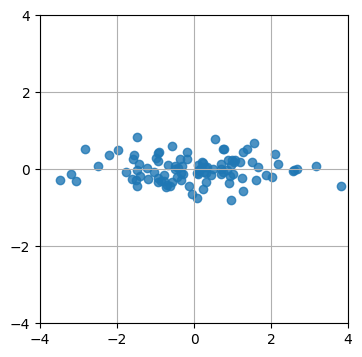

In [ ]:
#@markdown Just run
from sklearn.decomposition import PCA

X_ = (X - X.mean()) / X.std()

pca = PCA(n_components=2)

X_pca_ = pca.fit_transform(X_)

fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.scatter(X_pca_[:,0],X_pca_[:,1],alpha=0.8)

lim = np.ceil(abs(X_pca_).max().max())
ax.xaxis.set_major_locator(mticker.MaxNLocator(4))
ax.yaxis.set_major_locator(mticker.MaxNLocator(4))
ax.set_xlim([-lim,lim])
ax.set_ylim([-lim,lim])
ax.set_aspect('equal', adjustable='box')
plt.grid()
plt.show()



## Passos para o PCA

## 1. Normalize os dados

Empregue dados centralizados

In [ ]:
X_normalized = (X - X.mean()) / X.std()

## 2. Crie a Matriz de Covariância dos Dados



In [ ]:
cov_matrix = np.cov(X_normalized, rowvar=False)
cov_matrix


array([[1.        , 0.89427883],
       [0.89427883, 1.        ]])

## 3. Obtenha os Autovetores e Autovalores

Obtenha os Autovetores e Autovalores da matriz de covariância.

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

Os autovalores, do maior para o menor, devem indicar a ordem dos autovetores que correspondem à maior variância dos dados.

In [ ]:
sorted_indices = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

In [ ]:
eigenvalues

array([1.89427883, 0.10572117])

In [ ]:
eigenvectors = - eigenvectors
eigenvectors

array([[ 0.70710678,  0.70710678],
       [ 0.70710678, -0.70710678]])

In [ ]:
pd.DataFrame(eigenvectors,index=X.columns,columns=['PC1','PC2'])

,PC1,PC2
x,0.707107,0.707107
y,0.707107,-0.707107


In [ ]:
#@markdown Just a check
print(pca.components_)
print(pca.explained_variance_)

[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]
[1.89427883 0.10572117]


## 4. Projeção nos Componentes Principais

In [ ]:
eigenvectors.T

array([[ 0.70710678,  0.70710678],
       [ 0.70710678, -0.70710678]])

In [ ]:
# Projetar os dados nos componentes principais
X_pca = X_normalized.dot(eigenvectors)
# X_pca = np.matmul(X, top_2_eigenvectors)
X_pca.head()

,0,1
0,2.100366,0.385533
1,-0.627002,-0.441810
2,-0.782363,-0.153574
3,-1.520524,-0.281472
4,0.762490,0.516933


Vamos checar isso...

In [ ]:
X_normalized.head()

,x,y
0,1.757796,1.212570
1,-0.755764,-0.130950
2,-0.661808,-0.444621
3,-1.274204,-0.876142
4,0.904688,0.173635


In [ ]:
np.matmul(np.array([1.757796,	1.212570]), np.array([	0.707107,	0.707107])),  np.matmul(np.array([1.757796,	1.212570]), np.array([	0.707107, -0.707107]))

(2.100366591162, 0.385533121182)

In [ ]:
np.matmul(np.array([-0.755764,	-0.130950]), np.array([	0.707107,	0.707107])),  np.matmul(np.array([-0.755764,	-0.130950]), np.array([	0.707107, -0.707107]))

(-0.627001676398, -0.441810353098)

In [ ]:
#@markdown just check
X_pca_[0:10,:]

array([[ 2.10036570e+00,  3.85533247e-01],
       [-6.27001523e-01, -4.41810051e-01],
       [-7.82363352e-01, -1.53574451e-01],
       [-1.52052450e+00, -2.81471899e-01],
       [ 7.62490026e-01,  5.16932552e-01],
       [-3.47445831e+00, -2.80584690e-01],
       [ 2.68073540e+00, -3.33212084e-03],
       [-1.58607969e+00,  2.79688043e-01],
       [ 2.38642254e-01,  1.72223271e-01],
       [-4.97418042e-01,  4.68823389e-03]])

## 5. Selecione os Componentes Principais

Aqui você pode ver que PC1 carrega 82% da variação dos dados. Podemos, então, selecionar o número de componentes que queremos empregar definindo o mínimo de variância que queremos capturar. Aqui, se desejássemos 80% da variação dos dados, seria suficiente apenas um componente principal. Se desejássemos 90%, seriam necessários o PC1 e o PC2. Por hora, vamos empregar os dois componetes.

In [ ]:
X_pca.var() / X_pca.var().sum()

0    0.947139
1    0.052861
dtype: float64

In [ ]:
#@markdown Just a check, something wrong... in PCA? Algo se perdeu aqui...
print(pca.explained_variance_ratio_)


[0.94713941 0.05286059]


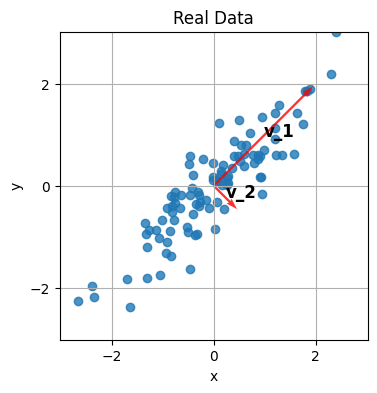

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(4,4))

lim = X_normalized.abs().max().max()
ax.scatter(X_normalized.iloc[:, 0], X_normalized.iloc[:, 1],alpha=0.8)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Real Data')

i=1
for length, vector in zip(eigenvalues,eigenvectors):
    v = vector * np.sqrt(length)
    ax.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=0.5, color='r',alpha=0.8)
    ax.text(v[0], v[1], f'v_{i}', weight='bold',fontsize=12)
    i=i+1

ax.xaxis.set_major_locator(mticker.MaxNLocator(4))
ax.yaxis.set_major_locator(mticker.MaxNLocator(4))
ax.set_xlim([-lim,lim])
ax.set_ylim([-lim,lim])
ax.set_aspect('equal', adjustable='box')
plt.grid()
plt.show()


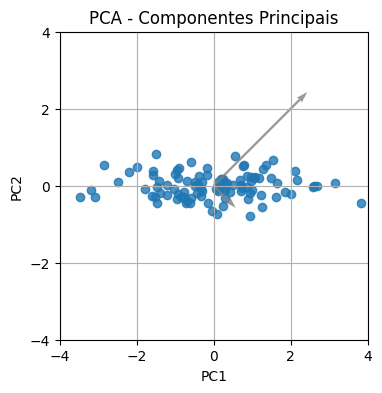

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(4,4))

lim = np.ceil(X_pca.abs().max().max())
ax.scatter(X_pca.iloc[:, 0], X_pca.iloc[:, 1],alpha=0.8)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('PCA - Componentes Principais')

i=1
for length, vector in zip(eigenvalues, eigenvectors):
    v = vector * np.sqrt(length)
    ax.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=0.4, color='grey',alpha=0.8)
    i=i+1

ax.xaxis.set_major_locator(mticker.MaxNLocator(4))
ax.yaxis.set_major_locator(mticker.MaxNLocator(4))
ax.set_xlim([-lim,lim])
ax.set_ylim([-lim,lim])
ax.set_aspect('equal', adjustable='box')
plt.grid()
plt.show()

# Let's try online

In [ ]:
from IPython.display import IFrame

url = "https://setosa.io/ev/principal-component-analysis/"

iframe = IFrame(src=url, width="100%", height=300)
iframe


# Vanilla Example: `iris`

## `by scratch`

In [ ]:
iris = sns.load_dataset('iris')
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


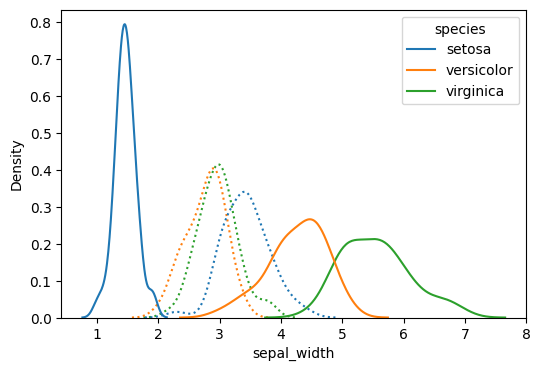

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(6,4))

sns.kdeplot(x='sepal_width',hue='species',data=iris,linestyle=':',ax=ax)
sns.kdeplot(x='petal_length',hue='species',data=iris,ax=ax)
plt.show()

In [ ]:
X = iris[['sepal_width','petal_length']]
X.head()


,sepal_width,petal_length
0,3.5,1.4
1,3.0,1.4
2,3.2,1.3
3,3.1,1.5
4,3.6,1.4


In [ ]:
# Normalized
X_normalized = (X - X.mean()) / X.std()

# Cov Matrix
cov_matrix = np.cov(X_normalized, rowvar=False)

# eigenvalues, eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
sorted_indices = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
eigenvectors = - eigenvectors


Como só temos 2 componentes não faz diferença aqui, mas... selecionamos do mesmo modo pois usaremos mais adiante.

In [ ]:
top_2_eigenvectors = eigenvectors[:, :2]

In [ ]:
# Projetar os dados nos componentes principais
X_pca = X_normalized.dot(top_2_eigenvectors)
# X_pca = np.matmul(X_normalized, top_2_eigenvectors)
X_pca

,0,1
0,-1.662658,0.226380
1,-0.851507,1.037531
2,-1.216023,0.753127
3,-0.973681,0.835245
4,-1.824888,0.064150
...,...,...
145,0.670619,-0.484595
146,1.401658,0.406668
147,0.670619,-0.484595
148,0.101810,-1.213627


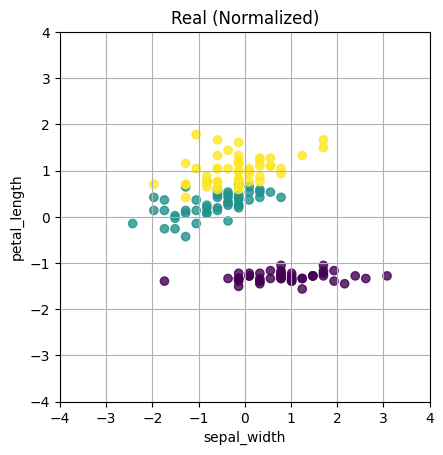

In [ ]:
fig, ax = plt.subplots(1,1)

lim = np.ceil(X_normalized.abs().max().max())
ax.scatter(X_normalized.iloc[:, 0], X_normalized.iloc[:, 1], c=iris['species'].astype('category').cat.codes, cmap='viridis',alpha=0.8)
ax.set_xlabel('sepal_width')
ax.set_ylabel('petal_length')
ax.set_title('Real (Normalized)')

ax.set_xlim([-lim,lim])
ax.set_ylim([-lim,lim])
ax.set_aspect('equal', adjustable='box')
plt.grid()
plt.show()

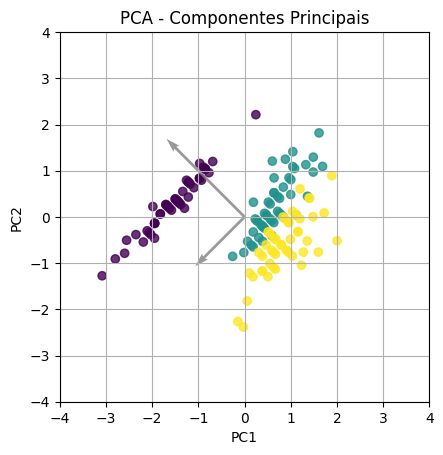

In [ ]:
fig, ax = plt.subplots(1,1)

lim = np.ceil(X_pca.abs().max().max())
ax.scatter(X_pca.iloc[:, 0], X_pca.iloc[:, 1], c=iris['species'].astype('category').cat.codes, cmap='viridis',alpha=0.8)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('PCA - Componentes Principais')

i=1
for length, vector in zip(eigenvalues[:2], top_2_eigenvectors.T):
    v = vector * np.sqrt(length)
    ax.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=0.5, color='grey',alpha=0.8)
    i=i+1

ax.set_xlim([-lim,lim])
ax.set_ylim([-lim,lim])
ax.set_aspect('equal', adjustable='box')
plt.grid()
plt.show()


## Using `scikit-larn` PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(X_normalized)

print(pca.components_)
print(pca.explained_variance_)

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[1.4284401 0.5715599]


In [ ]:
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_.T

In [ ]:
X_pca = pca.transform(X_normalized)
X_pca[0:10,:]

array([[ 1.66265809, -0.22637998],
       [ 0.85150705, -1.03753102],
       [ 1.21602341, -0.75312655],
       [ 0.97368132, -0.83524488],
       [ 1.8248883 , -0.06414978],
       [ 2.19141111,  0.54270867],
       [ 1.50042789, -0.38861019],
       [ 1.46037195, -0.34855425],
       [ 0.68927684, -1.19976123],
       [ 0.97368132, -0.83524488]])

In [ ]:
X_pca = pd.DataFrame(X_pca)
X_pca

,0,1
0,1.662658,-0.226380
1,0.851507,-1.037531
2,1.216023,-0.753127
3,0.973681,-0.835245
4,1.824888,-0.064150
...,...,...
145,-0.670619,0.484595
146,-1.401658,-0.406668
147,-0.670619,0.484595
148,-0.101810,1.213627


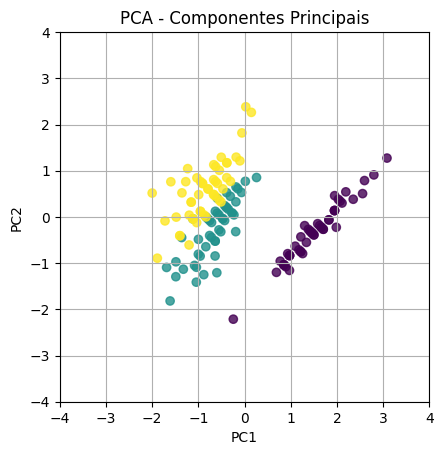

In [ ]:
fig, ax = plt.subplots(1,1)

lim = np.ceil(X_pca.abs().max().max())
ax.scatter(X_pca.iloc[:, 0], X_pca.iloc[:, 1], c=iris['species'].astype('category').cat.codes, cmap='viridis',alpha=0.8)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('PCA - Componentes Principais')

for length, vector in zip(eigenvalues[:2], top_2_eigenvectors.T):
    v = vector * np.sqrt(length)

ax.set_xlim([-lim,lim])
ax.set_ylim([-lim,lim])
ax.set_aspect('equal', adjustable='box')
plt.grid()
plt.show()

In [ ]:
from sklearn.decomposition import PCA

X = iris.drop(columns='species')
X_normalized = (X - X.mean()) / X.std()

pca = PCA(n_components=4)

pca.fit(X_normalized)

print(pca.components_)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]
 [-0.71956635  0.24438178  0.14212637  0.63427274]
 [-0.26128628  0.12350962  0.80144925 -0.52359713]]
[2.91849782 0.91403047 0.14675688 0.02071484]
[0.72962445 0.22850762 0.03668922 0.00517871]
[0.72962445 0.95813207 0.99482129 1.        ]


In [ ]:
from sklearn.decomposition import PCA

X = iris.drop(columns='species')
X_normalized = (X - X.mean()) / X.std()

pca = PCA(0.95)

pca.fit(X_normalized)

print(pca.components_)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]
[2.91849782 0.91403047]
[0.72962445 0.22850762]
[0.72962445 0.95813207]


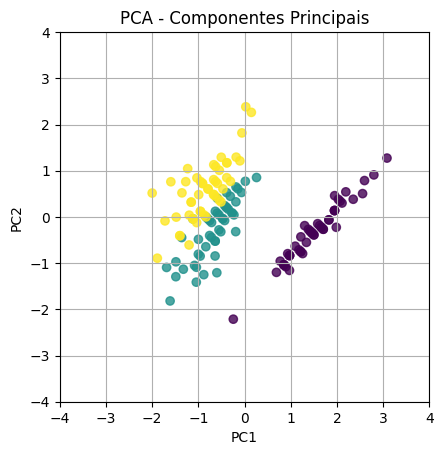

In [ ]:
fig, ax = plt.subplots(1,1)

lim = np.ceil(X_pca.abs().max().max())
ax.scatter(X_pca.iloc[:, 0], X_pca.iloc[:, 1], c=iris['species'].astype('category').cat.codes, cmap='viridis',alpha=0.8)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('PCA - Componentes Principais')

for length, vector in zip(eigenvalues[:2], top_2_eigenvectors.T):
    v = vector * np.sqrt(length)

ax.set_xlim([-lim,lim])
ax.set_ylim([-lim,lim])
ax.set_aspect('equal', adjustable='box')
plt.grid()
plt.show()

# Redução de Dimensionalidade e Visualização

Na figura anterior temos uma visualização da estrutura dos dados em 2 dimensões. Isso também pode ser útil para a redução do dados para o aprendizado.

Nos exemplos abaixo os mesmos resultados são obtidos empregando todos os dados e somente 2 componentes principais, correspondentes a 95% da variação dos dados.


## Clustering


In [ ]:
from sklearn.preprocessing import LabelEncoder

iris['species_code'] = LabelEncoder().fit_transform(iris.species)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_code
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [ ]:
from sklearn.cluster import KMeans

X = iris.drop(columns=['species','species_code'])

kmeans = KMeans(n_clusters=3, random_state=1,n_init="auto").fit(X)
iris['kmeans'] = kmeans.labels_

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_code,kmeans
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(iris['species_code'],iris['kmeans']))
print(accuracy_score(iris['species_code'],iris['kmeans']))

[[50  0  0]
 [ 0  3 47]
 [ 0 36 14]]
0.44666666666666666


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=1,n_init="auto").fit(X_pca)
iris['pca_kmeans'] = kmeans.labels_

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_code,kmeans,pca_kmeans
0,5.1,3.5,1.4,0.2,setosa,0,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0,0


In [ ]:
print(confusion_matrix(iris['species_code'],iris['kmeans']))
print(accuracy_score(iris['species_code'],iris['kmeans']))

[[50  0  0]
 [ 0  3 47]
 [ 0 36 14]]
0.44666666666666666


## Classification



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.drop(columns='species')
y = iris.species

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=3)

clf = LogisticRegression(max_iter=100)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

clf.score(X_test,y_test)

1.0

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

clf = LogisticRegression()
clf.fit(X_pca.loc[X_train.index],y[X_train.index])
y_pred = clf.predict(X_pca.loc[X_test.index])

clf.score(X_pca.loc[X_test.index],y[X_test.index])

0.8888888888888888

# Exercício

a) Faça um modelo de classificação dos dados a seguir com uma `RandomForest`. Compare os resultados do modelo empregando todos os dados de entrada e empregando somente dados que correspondem a mais de 70% da variância dos dados.

Empregue para separação dos conjuntos treinamento e teste, 0.3 de teste estratificados e `random_state=1` em todos os casos (lembre-se do `RandomForest`).

b) Faça um gráfico PC1 $\times$ PC2 e verifique isso proporciona alguma separação dos casos benignos e malignos. (dica: empregue cores diferentes para os pontos benignos e malignos).



In [ ]:
df = pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/breast-cancer-wisconsin.csv')
df = df[df.columns[0:-1]]
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
